In [1]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt 
from matplotlib import pyplot
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") 
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std

import warnings
warnings.simplefilter(action='ignore')

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# 1. Loading the data:

In [2]:
house = pd.read_csv('DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')
house.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


# 2. Data Exploration:

In [3]:
house.shape


(3000, 14)

In [4]:
house.describe()


,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


In [5]:
house.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [6]:
house.columns


Index(['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade'],
      dtype='object')

In [7]:
house.skew()


Id                0.000000
Area(total)      -0.003584
Trooms            0.008511
Nbedrooms         0.048713
Nbwashrooms       0.064233
Twashrooms        0.040511
Roof(Area)        0.078216
Lawn(Area)       -0.054065
Nfloors           0.001454
API              -0.012462
ANB              -0.003799
Expected price    0.090646
dtype: float64

In [8]:
house.isnull().sum()


Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

In [9]:
house.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

# Understanding categorical variables:

In [10]:
house.roof.value_counts()


YES    1543
NO     1457
Name: roof, dtype: int64

In [11]:
house.Grade.value_counts()


D    1270
C     716
B     539
A     399
E      76
Name: Grade, dtype: int64

# EDA :

In [12]:
def bar_percentage(ax, count: "number of rows in data "):
    for bar in ax.patches:                                            # ax.patches returns the rectange object from matplotlib
        percentage = f"{round((bar.get_height() / count) *100, 2)}%"  # first it calculate the bar height and then dividing by the number of row(to calculate percentage)
                                                                            # in data and multiply with 100 to get the percentage and rounding of by 2 numbers.
        x = bar.get_x() + bar.get_width() /2                          # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
        y = bar.get_height()                                          # get_height: returns height of rectangle bar.
        ax.annotate(percentage, (x, y), va = "bottom", ha = "center") # va: Vertical axis: -> top means percentage would bneath the bar head. top, bottom or center 
                                                                      # ha: Horizontal axis:-> how you want to keep it. can be changed to center, left, right.
                                                                      # annotate: used to annotate over objects. here objects are the bars 
    plt.show()

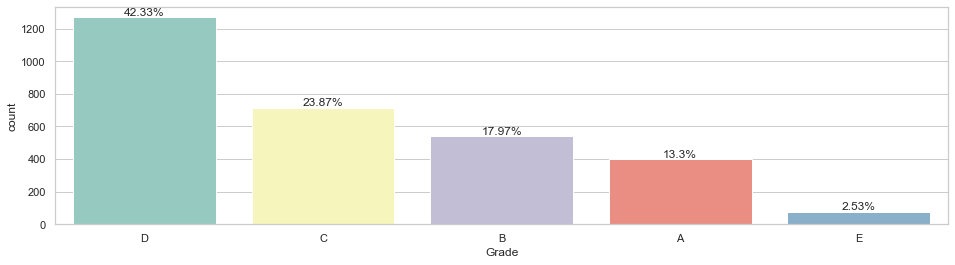

In [13]:
fig, ax = plt.subplots(figsize  = (16 , 4))
ax = sns.countplot(x = house["Grade"], palette='Set3')
bar_percentage(ax, len(house))  

### Interpretation: Grade D has highest count of about 42.3%.

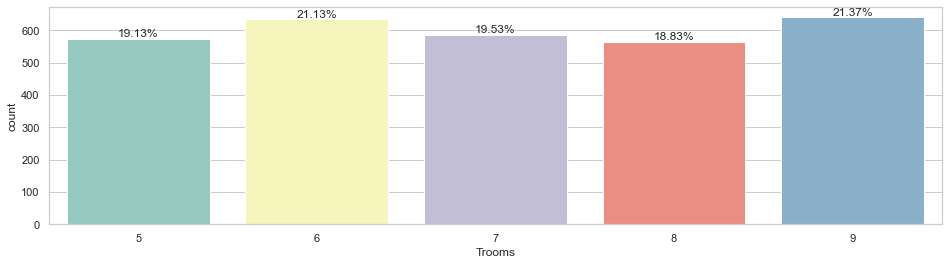

In [14]:
fig, ax = plt.subplots(figsize  = (16 , 4))
ax = sns.countplot(x = house["Trooms"], palette='Set3')
bar_percentage(ax, len(house)) 

### Interpretation: Total rooms are highest 9 followed by 6 in most houses.


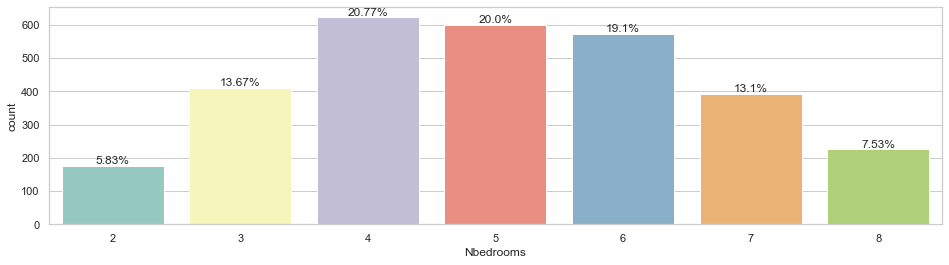

In [15]:
fig, ax = plt.subplots(figsize  = (16 , 4))
ax = sns.countplot(x = house["Nbedrooms"], palette='Set3')
bar_percentage(ax, len(house)) 

### Interpretation: Total number of bedrooms are highest as 4 followed by 5 in most houses.

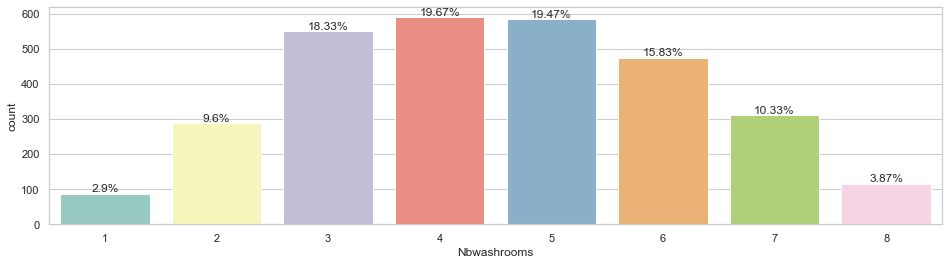

In [16]:
fig, ax = plt.subplots(figsize  = (16 , 4))
ax = sns.countplot(x = house["Nbwashrooms"], palette='Set3')
bar_percentage(ax, len(house)) 

### Interpretation: Total number of washrooms are highest as 4 followed by 5 in most houses.

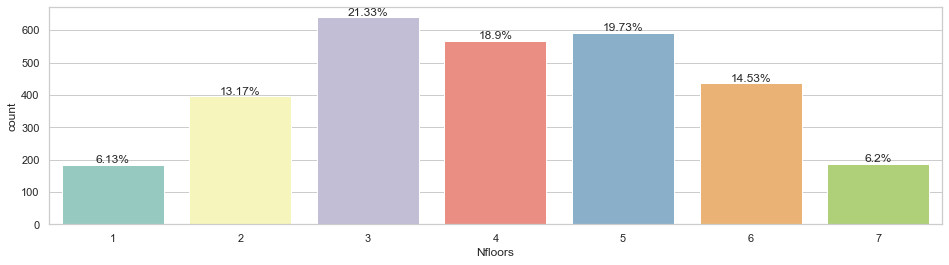

In [17]:
fig, ax = plt.subplots(figsize  = (16 , 4))
ax = sns.countplot(x = house["Nfloors"], palette='Set3')
bar_percentage(ax, len(house)) 

### Interpretation: Total number of floors are highest as 3 followed by 5 in most houses

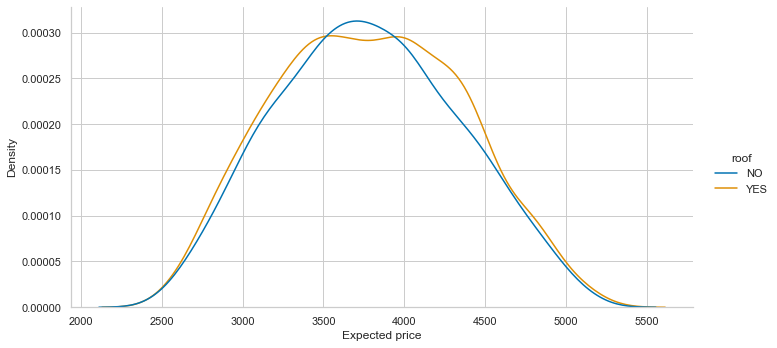

In [18]:
ax=sns.displot(data = house, x= 'Expected price', hue = 'roof', kind = 'kde', palette = 'colorblind', aspect= 2);



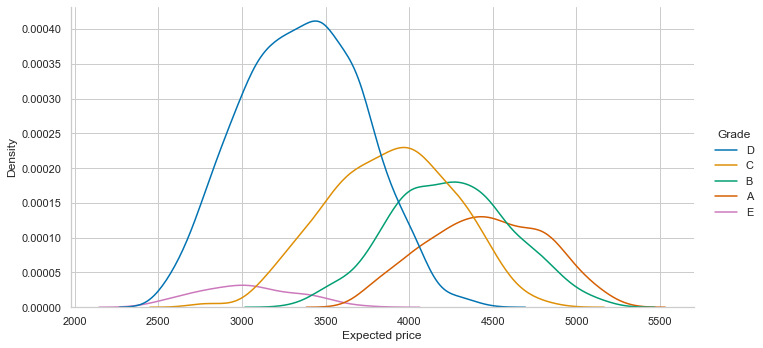

In [19]:
ax=sns.displot(data = house, x= 'Expected price', hue = 'Grade', kind = 'kde', palette = 'colorblind', aspect= 2);



### Interpretation: Grade E has the lowest price range and density whereas Grade B has highest.

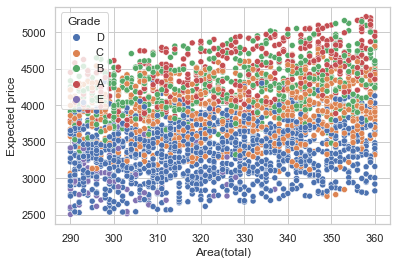

In [20]:
ax = sns.scatterplot('Area(total)','Expected price',hue='Grade', data=house)

### Interpretation: Grade D and E have lowest prices whereas A and B have highest.

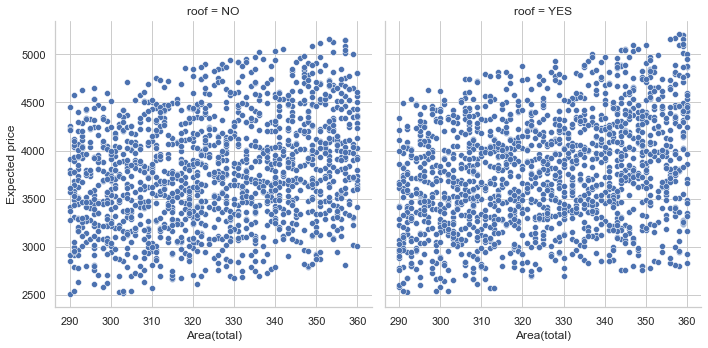

In [21]:
sns.relplot(data = house, x = 'Area(total)', y = 'Expected price', kind = 'scatter', col = "roof");


### Interpretation: There is very minute difference in prices of houses with and without roof.

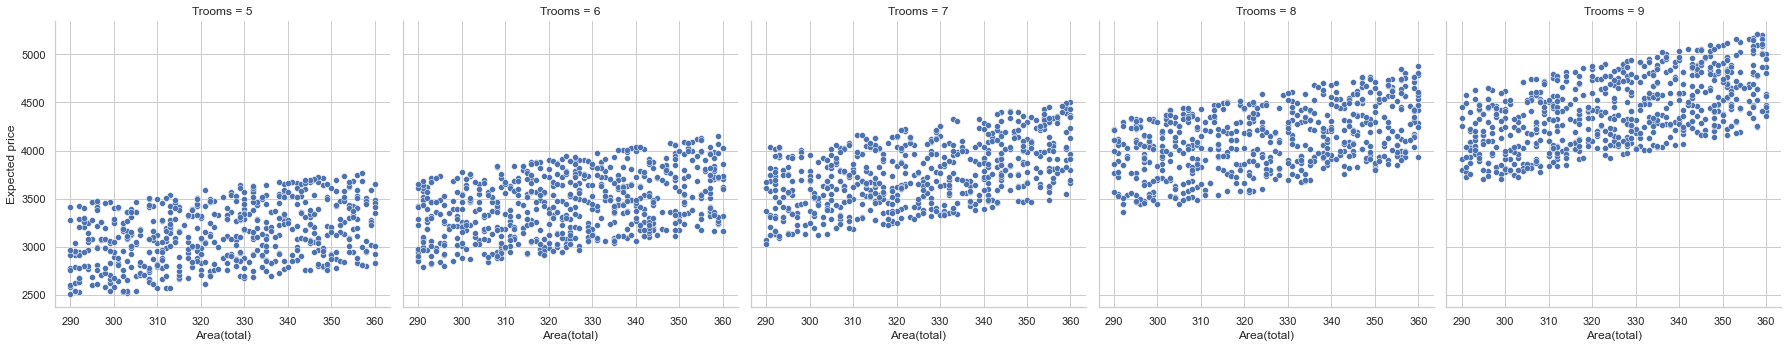

In [22]:
sns.relplot(data = house, x = 'Area(total)', y = 'Expected price', kind = 'scatter', col = "Trooms");


### Interpretation: Price increases as total number of rooms increase wrt area.

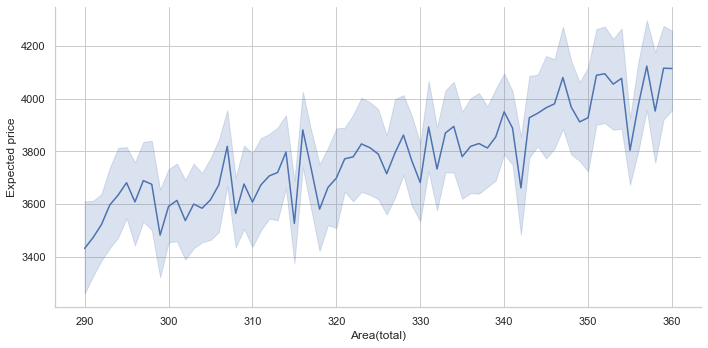

In [23]:
sns.relplot(data = house, x = 'Area(total)', y = 'Expected price', kind = 'line', aspect = 2);


### Interpretation: Overall price increases with increase in total area, exceptions are there due to other factors.

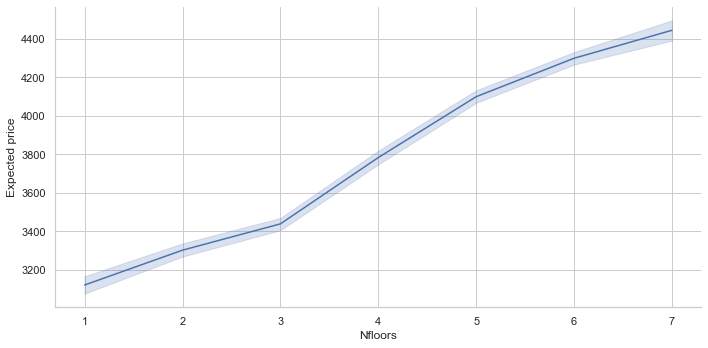

In [24]:
sns.relplot(data = house, x = 'Nfloors', y = 'Expected price', kind = 'line', aspect = 2);


### Interpretation: Price increases with increase in number of floors and highest at 7 floors.

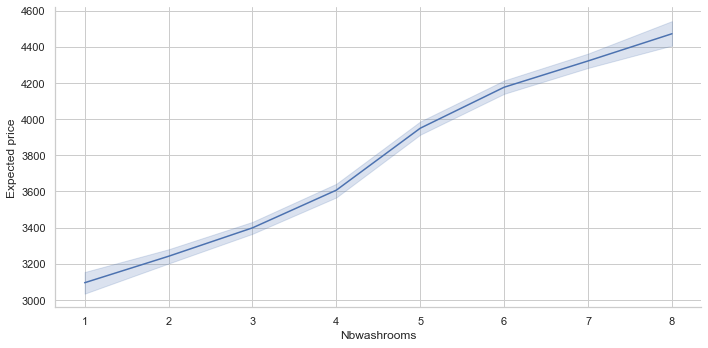

In [25]:
sns.relplot(data = house, x = 'Nbwashrooms', y = 'Expected price', kind = 'line', aspect = 2);


### Interpretation: Price increases with increase in number of washrooms and highest at 8.

<AxesSubplot:xlabel='Expected price', ylabel='Density'>

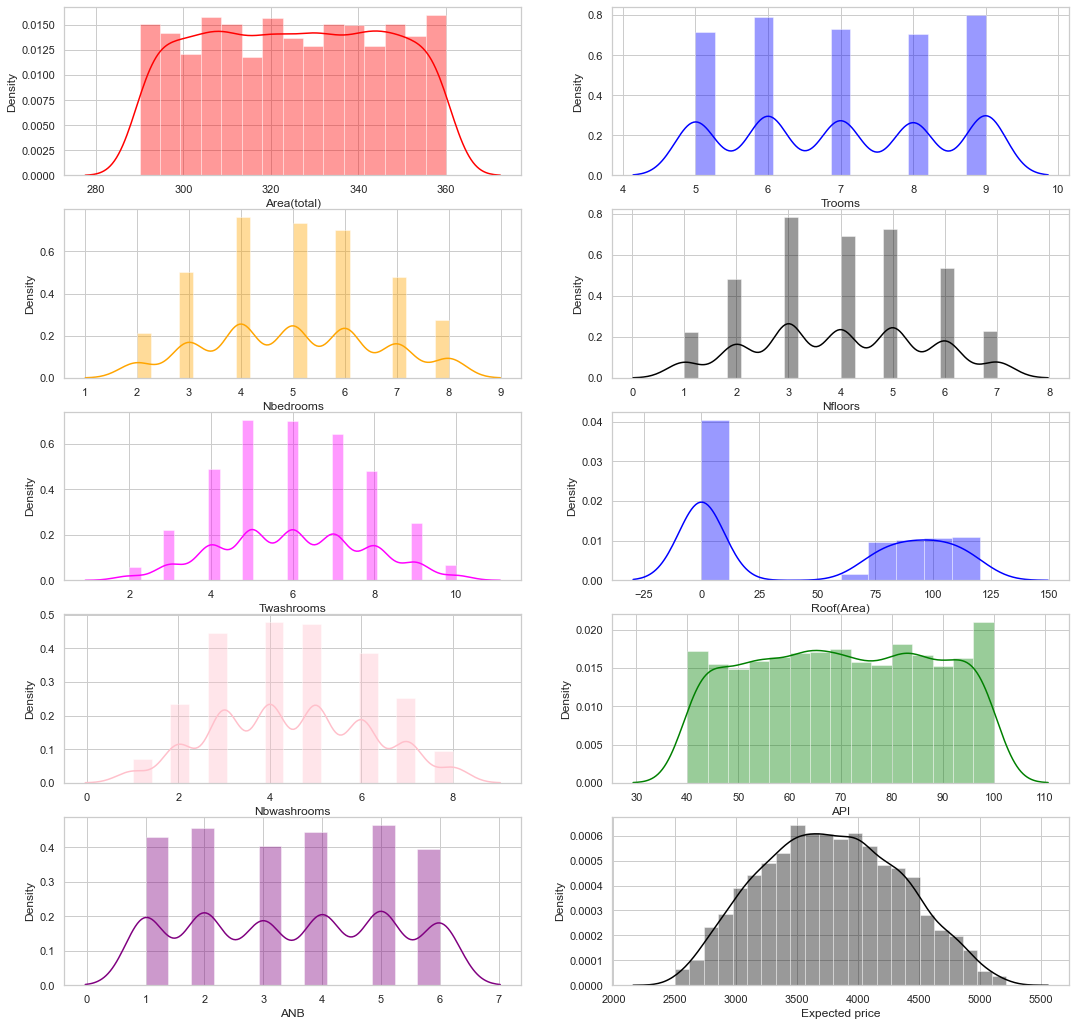

In [26]:
# Before Transformation
fig, ax = plt.subplots(5,2,figsize = (18,18))
sns.distplot(house["Area(total)"], kde =True, ax=ax[0,0], color = "red")
sns.distplot(house["Trooms"], kde =True, ax=ax[0,1], color = "blue")
sns.distplot(house["Nbedrooms"], kde =True, ax=ax[1,0], color = "orange")
sns.distplot(house["Nfloors"], kde =True, ax=ax[1,1], color = "black")
sns.distplot(house["Twashrooms"], kde =True, ax=ax[2,0], color = "magenta")
sns.distplot(house["Roof(Area)"], kde =True, ax=ax[2,1], color = "blue")
sns.distplot(house["Nbwashrooms"], kde =True, ax=ax[3,0], color = "pink")
sns.distplot(house["API"], kde =True, ax=ax[3,1], color = "green")
sns.distplot(house["ANB"], kde =True, ax=ax[4,0], color = "purple")
sns.distplot(house["Expected price"], kde =True, ax=ax[4,1], color = "black")


<AxesSubplot:>

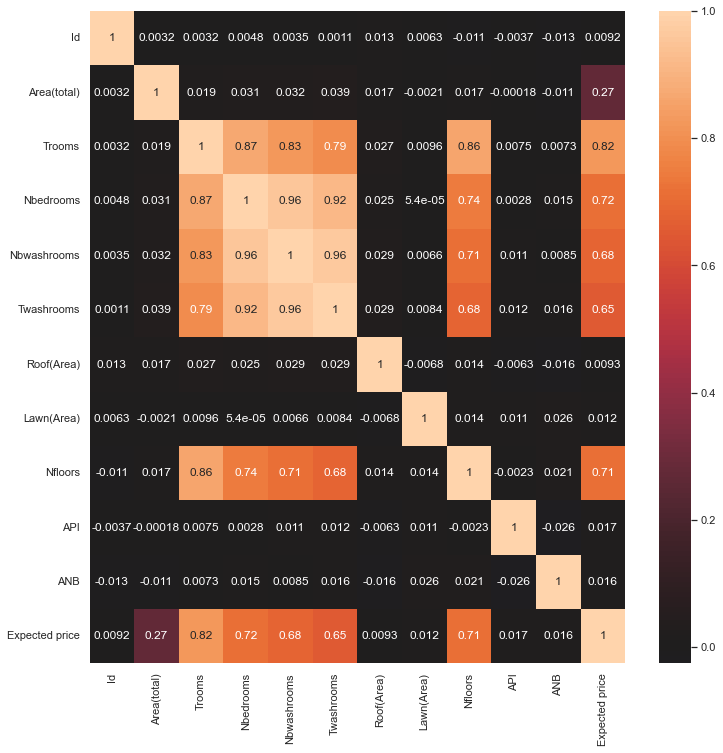

In [27]:
plt.figure(figsize=[12,12])
sns.set(font_scale=1)
sns.heatmap(house.corr(),center=0,annot=True)

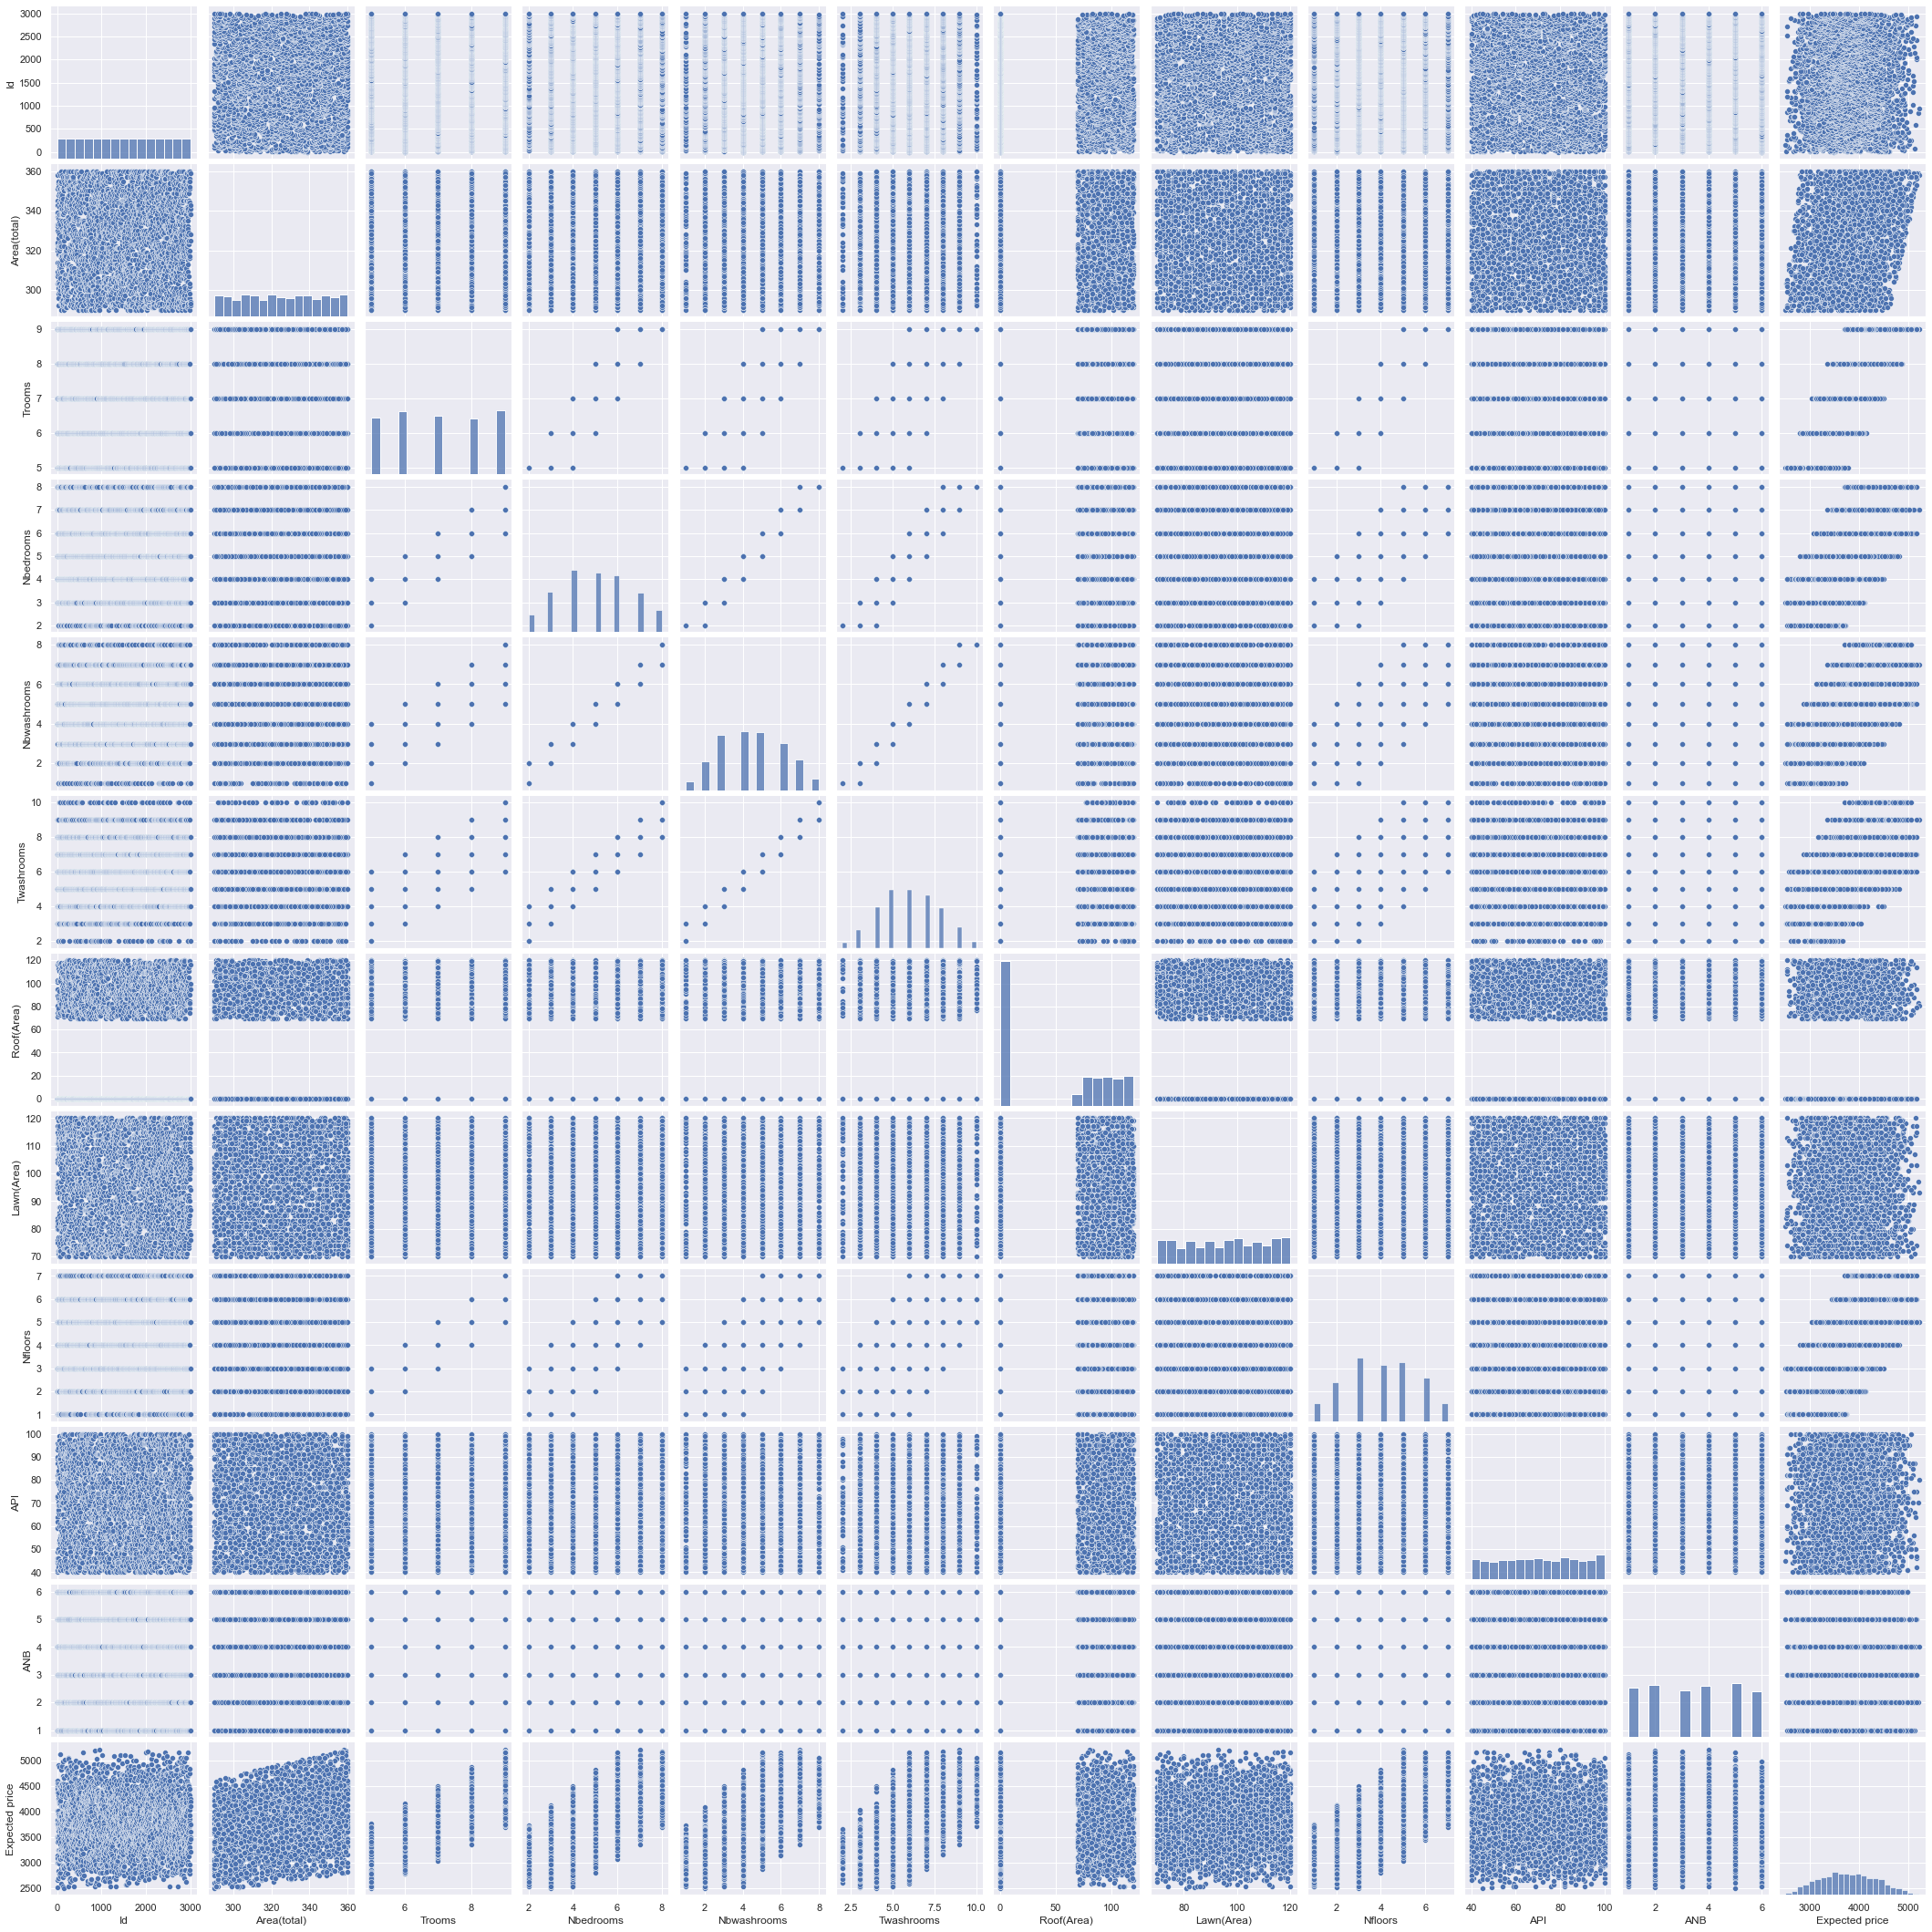

In [28]:
sns.pairplot(data = house)

# 4. PREPROCESSING: 

In [29]:
house['roof']=house['roof'].astype('category')
house['Grade']=house['Grade'].astype('category')


In [30]:
#bathroom dummies creation
roof_dummies= pd.get_dummies(house.roof, prefix="bathrooms")
house_dummies = pd.concat([house,roof_dummies],axis='columns')
house_dummies.drop('roof',axis='columns',inplace=True)

In [31]:
house_dummies

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade,bathrooms_NO,bathrooms_YES
0,1,339,6,5,4,6,0,76,2,79,6,3481,D,1,0
1,2,358,5,4,3,4,71,96,3,72,4,3510,D,0,1
2,3,324,7,5,4,5,101,117,5,64,3,3748,C,0,1
3,4,330,6,4,3,5,101,82,2,59,2,3134,D,0,1
4,5,320,7,4,4,5,0,75,3,40,1,3843,D,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,95,115,5,90,2,4246,B,0,1
2996,2997,292,9,8,7,8,116,87,7,97,4,3753,A,0,1
2997,2998,328,7,4,3,5,0,78,5,95,6,3607,D,1,0
2998,2999,293,9,7,7,8,0,78,7,51,3,4198,B,1,0


In [32]:
house_dummies.shape


(3000, 15)

In [33]:
sc = MinMaxScaler() 
house_dummies[['Expected price']] = sc.fit_transform(house_dummies[['Expected price']])

house_df= house_dummies.drop('Id',axis='columns',inplace=True)


In [34]:
house_dummies


,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade,bathrooms_NO,bathrooms_YES
0,339,6,5,4,6,0,76,2,79,6,0.360251,D,1,0
1,358,5,4,3,4,71,96,3,72,4,0.370944,D,0,1
2,324,7,5,4,5,101,117,5,64,3,0.458702,C,0,1
3,330,6,4,3,5,101,82,2,59,2,0.232301,D,0,1
4,320,7,4,4,5,0,75,3,40,1,0.493732,D,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,341,9,6,5,7,95,115,5,90,2,0.642330,B,0,1
2996,292,9,8,7,8,116,87,7,97,4,0.460546,A,0,1
2997,328,7,4,3,5,0,78,5,95,6,0.406711,D,1,0
2998,293,9,7,7,8,0,78,7,51,3,0.624631,B,1,0


In [35]:
from sklearn.model_selection import train_test_split
X=house_dummies.drop(['Grade'], axis =1)
y=house_dummies[["Grade"]]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [36]:
# define lists to gather results for plotting later
result, name = list(), list()


# MODEL 1 : LOGISTIC REGRESSION

In [37]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
n_scores = cross_val_score(logreg, X, y , scoring='accuracy', cv=10, n_jobs=-1, error_score='raise')
result.append(n_scores)
name.append('LogReg')

print('ACCURACY: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


/Users/maitrinarang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maitrinarang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maitrinarang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maitrinarang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed w

ACCURACY: 0.651 (0.023)


/Users/maitrinarang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/maitrinarang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

# MODEL 2 : RANDOM FOREST CLASSIFIER 

In [38]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
n_scores = cross_val_score(classifier_rf, X,y , scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

result.append(n_scores)
name.append('RandomForest')

print('ACCURACY: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/Users/maitrinarang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maitrinarang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maitrinarang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maitrinarang/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

ACCURACY: 0.843 (0.011)


In [39]:
classifier_rf.oob_score_


0.84125

# MODEL 3 : DECISION TREE 

In [40]:
# define the model
model = DecisionTreeClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
n_scores = cross_val_score(model, X,y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

result.append(n_scores)
name.append('DecisionTree')

# report performance
print('ACCURACY: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


ACCURACY: 0.842 (0.011)


# MODEL 4 : ADABOOST

In [41]:
from sklearn.ensemble import AdaBoostClassifier



In [42]:
# define the model
model_ada = AdaBoostClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
n_scores = cross_val_score(model_ada, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

result.append(n_scores)
name.append('Adaboost')

# report performance
print('ACCURACY: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


/Users/maitrinarang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maitrinarang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maitrinarang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maitrinarang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed w

ACCURACY: 0.621 (0.063)


/Users/maitrinarang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maitrinarang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# MODEL 5 : STACKING

In [43]:
# required Python libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier


In [44]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('rf', RandomForestClassifier()))
	# define meta learner model
	level1 = RandomForestClassifier()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model


In [45]:
# define the model
model_stack = get_stacking()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
n_scores = cross_val_score(model_stack, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

result.append(n_scores)
name.append('Stacking')

# report performance
print('ACCURACY: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))



/Users/maitrinarang/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maitrinarang/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maitrinarang/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maitrinarang/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector 

ACCURACY: 0.911 (0.014)


# MODEL 6 : KNN 

In [46]:
from sklearn import neighbors       
k=5    
knn = neighbors.KNeighborsClassifier(k)
knn.fit(X, y)


KNeighborsClassifier()

In [47]:
# Model Properties
print(knn.classes_)
print(knn.n_neighbors)


['A' 'B' 'C' 'D' 'E']
5


In [48]:
predict= knn.predict(X_test)


In [49]:
score = knn.score( X_test, y_test)
print(score)


0.7016666666666667


In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)


0.7016666666666667

Text(0, 0.5, 'Error Rate')

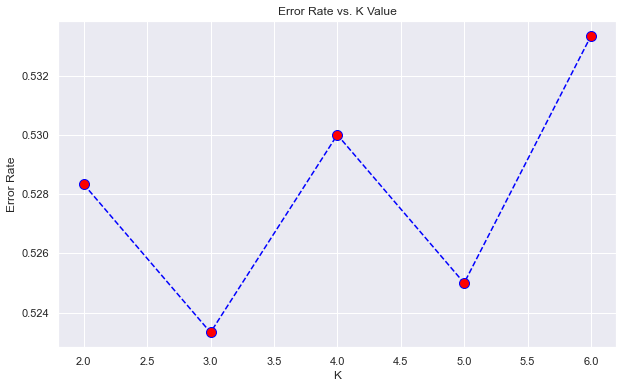

In [51]:
error_rate = []
for i in range(2,7):
    knn_house = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn_house.fit(X_train,y_train)
    pred_i = knn_house.predict(X_test).reshape(600,1)
    error_rate.append(np.mean(pred_i!= y_test))

plt.figure(figsize=(10,6))
plt.plot(range(2,7),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [52]:
k=3
knn2 = neighbors.KNeighborsClassifier(k)
knn2.fit(X, y)
n_scores = cross_val_score(knn2, X, y, scoring='accuracy', cv=3)
result.append(n_scores)
name.append('knn')

# report performance
print('ACCURACY: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

ACCURACY: 0.478 (0.006)


In [53]:
print(knn2.classes_)
print(knn2.n_neighbors)


['A' 'B' 'C' 'D' 'E']
3


In [54]:
predict2= knn2.predict(X_test)


In [55]:
score2 = knn2.score( X_test, y_test)
print(score2)

0.775


In [56]:
result


[array([0.64666667, 0.69      , 0.65      , 0.62666667, 0.65      ,
        0.68      , 0.61      , 0.67      , 0.65333333, 0.63666667]),
 array([0.83833333, 0.84      , 0.86166667, 0.83      , 0.85      ,
        0.83166667, 0.83166667, 0.86166667, 0.845     , 0.83666667]),
 array([0.84333333, 0.81666667, 0.84333333, 0.85833333, 0.845     ,
        0.83166667, 0.84666667, 0.83666667, 0.85333333, 0.84666667]),
 array([0.57333333, 0.605     , 0.56333333, 0.61666667, 0.58166667,
        0.73666667, 0.75      , 0.595     , 0.59333333, 0.59      ]),
 array([0.924, 0.933, 0.914, 0.903, 0.9  , 0.893]),
 array([0.471, 0.477, 0.485])]

In [57]:
name


['LogReg', 'RandomForest', 'DecisionTree', 'Adaboost', 'Stacking', 'knn']

In [58]:
result


[array([0.64666667, 0.69      , 0.65      , 0.62666667, 0.65      ,
        0.68      , 0.61      , 0.67      , 0.65333333, 0.63666667]),
 array([0.83833333, 0.84      , 0.86166667, 0.83      , 0.85      ,
        0.83166667, 0.83166667, 0.86166667, 0.845     , 0.83666667]),
 array([0.84333333, 0.81666667, 0.84333333, 0.85833333, 0.845     ,
        0.83166667, 0.84666667, 0.83666667, 0.85333333, 0.84666667]),
 array([0.57333333, 0.605     , 0.56333333, 0.61666667, 0.58166667,
        0.73666667, 0.75      , 0.595     , 0.59333333, 0.59      ]),
 array([0.924, 0.933, 0.914, 0.903, 0.9  , 0.893]),
 array([0.471, 0.477, 0.485])]

In [59]:
name


['LogReg', 'RandomForest', 'DecisionTree', 'Adaboost', 'Stacking', 'knn']

In [60]:
result


[array([0.64666667, 0.69      , 0.65      , 0.62666667, 0.65      ,
        0.68      , 0.61      , 0.67      , 0.65333333, 0.63666667]),
 array([0.83833333, 0.84      , 0.86166667, 0.83      , 0.85      ,
        0.83166667, 0.83166667, 0.86166667, 0.845     , 0.83666667]),
 array([0.84333333, 0.81666667, 0.84333333, 0.85833333, 0.845     ,
        0.83166667, 0.84666667, 0.83666667, 0.85333333, 0.84666667]),
 array([0.57333333, 0.605     , 0.56333333, 0.61666667, 0.58166667,
        0.73666667, 0.75      , 0.595     , 0.59333333, 0.59      ]),
 array([0.924, 0.933, 0.914, 0.903, 0.9  , 0.893]),
 array([0.471, 0.477, 0.485])]

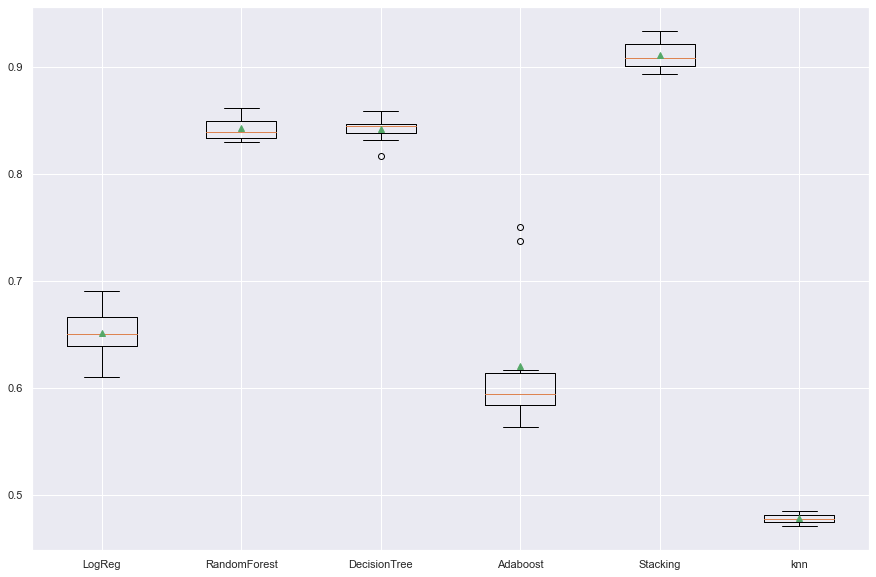

In [61]:
plt.figure(figsize=(15,10))
plt.boxplot(result, labels=name, showmeans=True)
plt.show()


### 1. Accuracy
On the basis of accuracy, top performers are STACKING, DECISION TREE AND RANDOM FOREST.

### 2. Mean & Median
Mean and Median are almost same for STACKING and RANDOM FOREST.

### 3. Distribution
STACKING and RANDOM FOREST have a almost normal distribution out of these 3.

### 4. Skewness
STACKING has least skewness, whereas RANDOM FOREST and DT are right skewed.

### 5. Outliers
DECISION TREE has outliers whereas STACKING and RANDOM FOREST dont.

## Based on the above observations, STACKING MODEL will be the apt choice with highest accuracy of 91.5% , same mean median, normal dist, no skewness and outliers .